In [31]:
import pandas as pd
from tqdm import tqdm

data_dir = '/home1/amey/MIMIC/mimic-cxr-jpg-2.0.0.physionet.org/data/'

ALL_LBLS = ['No Finding',
            'Cardiomegaly',
            'Edema',
            'Consolidation',
            'Atelectasis',
            'Pleural Effusion',
            'Enlarged Cardiomediastinum',
            'Lung Opacity',
            'Lung Lesion',
            'Pneumonia',
            'Pneumothorax',
            'Pleural Other',
            'Fracture',
            'Support Devices']

In [29]:
split = pd.read_csv(data_dir+'mimic-cxr-2.0.0-split.csv.gz')
split

data = pd.read_csv(data_dir+'mimic-cxr-2.0.0-chexpert.csv.gz').fillna(0)
data = data.merge(split)
data

files = ['p{0}/p{1}/s{2}/{3}.jpg'.format(int(data.iloc[idx, 0])//1000000, data.iloc[idx, 0], data.iloc[idx, 1], data.iloc[idx, -2]) for idx in tqdm(range(len(data)))]
data['path'] = files
data = data[['path']+list(data.columns[:-1])]
data.to_csv(data_dir+'mimic-chexpert-data.csv', index=False)
data

100%|██████████| 377095/377095 [00:17<00:00, 21387.14it/s]


,path,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,dicom_id,split
0,p10/p10000032/s50414267/02aa804e-bde0afdd-112c...,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,train
1,p10/p10000032/s50414267/174413ec-4ec4c1f7-34ea...,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,train
2,p10/p10000032/s53189527/2a2277a9-b0ded155-c0de...,10000032,53189527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,train
3,p10/p10000032/s53189527/e084de3b-be89b11e-20fe...,10000032,53189527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,train
4,p10/p10000032/s53911762/68b5c4b1-227d0485-9cc3...,10000032,53911762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377090,p19/p19999733/s57132437/428e2c18-5721d8f3-35a0...,19999733,57132437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,428e2c18-5721d8f3-35a05001-36f3d080-9053b83c,train
377091,p19/p19999733/s57132437/58c403aa-35ff8bd9-73e3...,19999733,57132437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,58c403aa-35ff8bd9-73e39f54-8dc9cc5d-e0ec3fa9,train
377092,p19/p19999987/s55368167/58766883-376a15ce-3b32...,19999987,55368167,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58766883-376a15ce-3b323a28-6af950a0-16b793bd,train
377093,p19/p19999987/s58621812/7ba273af-3d290f8d-e28d...,19999987,58621812,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7ba273af-3d290f8d-e28d0ab4-484b7a86-7fc12b08,train


In [32]:
train_chexpert = data[data['split'] == 'train'][['path']+ALL_LBLS]
train_chexpert.to_csv(data_dir+'mimic-chexpert-train.csv', index=False)
train_chexpert.replace({-1:0}).to_csv(data_dir+'mimic-chexpert-train-u0.csv', index=False)
train_chexpert.replace({-1:1}).to_csv(data_dir+'mimic-chexpert-train-u1.csv', index=False)
train_chexpert

,path,No Finding,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion,Enlarged Cardiomediastinum,Lung Opacity,Lung Lesion,Pneumonia,Pneumothorax,Pleural Other,Fracture,Support Devices
0,p10/p10000032/s50414267/02aa804e-bde0afdd-112c...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,p10/p10000032/s50414267/174413ec-4ec4c1f7-34ea...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,p10/p10000032/s53189527/2a2277a9-b0ded155-c0de...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,p10/p10000032/s53189527/e084de3b-be89b11e-20fe...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,p10/p10000032/s53911762/68b5c4b1-227d0485-9cc3...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377090,p19/p19999733/s57132437/428e2c18-5721d8f3-35a0...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377091,p19/p19999733/s57132437/58c403aa-35ff8bd9-73e3...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377092,p19/p19999987/s55368167/58766883-376a15ce-3b32...,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377093,p19/p19999987/s58621812/7ba273af-3d290f8d-e28d...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
valid_chexpert = data[data['split'] == 'validate'][['path']+ALL_LBLS]
valid_chexpert.to_csv(data_dir+'mimic-chexpert-valid.csv', index=False)
valid_chexpert.replace({-1:0}).to_csv(data_dir+'mimic-chexpert-valid-u0.csv', index=False)
valid_chexpert.replace({-1:1}).to_csv(data_dir+'mimic-chexpert-valid-u1.csv', index=False)
valid_chexpert

,path,No Finding,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion,Enlarged Cardiomediastinum,Lung Opacity,Lung Lesion,Pneumonia,Pneumothorax,Pleural Other,Fracture,Support Devices
279,p10/p10003502/s50084553/70d7e600-373c1311-929f...,0.0,-1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
280,p10/p10003502/s51180958/1fa79752-9ddaf5b5-2120...,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
281,p10/p10003502/s51180958/a8319f39-9eef5bb2-5bd9...,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
282,p10/p10003502/s52139270/489faba7-a9dc5f1d-fd72...,0.0,1.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
283,p10/p10003502/s52139270/550e6f3b-f008c1d0-8d2d...,0.0,1.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375314,p19/p19950864/s52815959/61b2e5b3-5192e298-d282...,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
375315,p19/p19950864/s53502057/1fc7bf88-79d4deaf-2efe...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
375316,p19/p19950864/s53502057/4e9a15d6-c451210c-9add...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
375317,p19/p19950864/s58368837/b66f1c8b-6c12fd80-d9b6...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
test_chexpert = data[data['split'] == 'test'][['path']+ALL_LBLS]
test_chexpert.to_csv(data_dir+'mimic-chexpert-test.csv', index=False)
test_chexpert.replace({-1:0}).to_csv(data_dir+'mimic-chexpert-test-u0.csv', index=False)
test_chexpert.replace({-1:1}).to_csv(data_dir+'mimic-chexpert-test-u1.csv', index=False)
test_chexpert

,path,No Finding,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion,Enlarged Cardiomediastinum,Lung Opacity,Lung Lesion,Pneumonia,Pneumothorax,Pleural Other,Fracture,Support Devices
1461,p10/p10032725/s50331901/687754ce-7420bfd3-0a19...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1462,p10/p10032725/s55504914/fd4126e5-c5485b35-3bbc...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1825,p10/p10046166/s50051329/427446c1-881f5cce-8519...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1826,p10/p10046166/s50051329/abea5eb9-b7c32823-3a14...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1827,p10/p10046166/s51738740/3a8a17fc-3cd357d9-8346...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376644,p19/p19991135/s58283482/313f1d75-23648c34-dd36...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
376645,p19/p19991135/s58283482/4d0251eb-cc875c55-fde8...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
376646,p19/p19991135/s58283482/f6a7a470-9e057a45-d244...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
376647,p19/p19991135/s59381316/43636aec-98ae2504-18f0...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


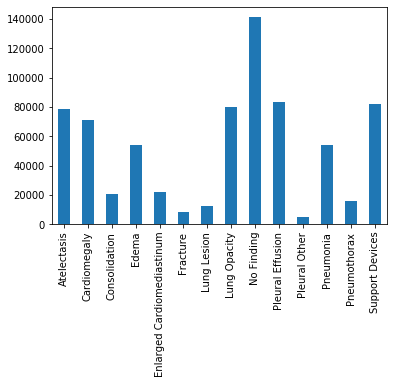

In [36]:
count = train_chexpert[['Atelectasis', 'Cardiomegaly',
       'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture',
       'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion',
       'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices']].replace({-1:1})

count = count.sum(axis = 0, skipna = True)
ax = count.plot(kind='bar')
# print(count)

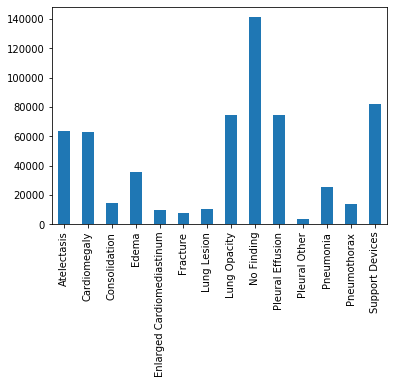

In [37]:
count = train_chexpert[['Atelectasis', 'Cardiomegaly',
       'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture',
       'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion',
       'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices']].replace({-1:0})

count = count.sum(axis = 0, skipna = True)
ax = count.plot(kind='bar')
# print(count)

In [38]:
split = pd.read_csv(data_dir+'mimic-cxr-2.0.0-split.csv.gz')
split

data = pd.read_csv(data_dir+'mimic-cxr-2.0.0-negbio.csv.gz').fillna(0)
data = data.merge(split)
data

files = ['p{0}/p{1}/s{2}/{3}.jpg'.format(int(data.iloc[idx, 0])//1000000, data.iloc[idx, 0], data.iloc[idx, 1], data.iloc[idx, -2]) for idx in tqdm(range(len(data)))]
data['path'] = files
data = data[['path']+list(data.columns[:-1])]
data.to_csv(data_dir+'mimic-negbio-data.csv', index=False)
data

100%|██████████| 377095/377095 [00:17<00:00, 21299.13it/s]


,path,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,dicom_id,split
0,p10/p10000032/s50414267/02aa804e-bde0afdd-112c...,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,train
1,p10/p10000032/s50414267/174413ec-4ec4c1f7-34ea...,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,train
2,p10/p10000032/s53189527/2a2277a9-b0ded155-c0de...,10000032,53189527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,train
3,p10/p10000032/s53189527/e084de3b-be89b11e-20fe...,10000032,53189527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,train
4,p10/p10000032/s53911762/68b5c4b1-227d0485-9cc3...,10000032,53911762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377090,p19/p19999733/s57132437/428e2c18-5721d8f3-35a0...,19999733,57132437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,428e2c18-5721d8f3-35a05001-36f3d080-9053b83c,train
377091,p19/p19999733/s57132437/58c403aa-35ff8bd9-73e3...,19999733,57132437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,58c403aa-35ff8bd9-73e39f54-8dc9cc5d-e0ec3fa9,train
377092,p19/p19999987/s55368167/58766883-376a15ce-3b32...,19999987,55368167,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58766883-376a15ce-3b323a28-6af950a0-16b793bd,train
377093,p19/p19999987/s58621812/7ba273af-3d290f8d-e28d...,19999987,58621812,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7ba273af-3d290f8d-e28d0ab4-484b7a86-7fc12b08,train


In [39]:
train_negbio = data[data['split'] == 'train'][['path']+ALL_LBLS]
train_negbio.to_csv(data_dir+'mimic-negbio-train.csv', index=False)
train_negbio.replace({-1:0}).to_csv(data_dir+'mimic-negbio-train-u0.csv', index=False)
train_negbio.replace({-1:1}).to_csv(data_dir+'mimic-negbio-train-u1.csv', index=False)
train_negbio

,path,No Finding,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion,Enlarged Cardiomediastinum,Lung Opacity,Lung Lesion,Pneumonia,Pneumothorax,Pleural Other,Fracture,Support Devices
0,p10/p10000032/s50414267/02aa804e-bde0afdd-112c...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,p10/p10000032/s50414267/174413ec-4ec4c1f7-34ea...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,p10/p10000032/s53189527/2a2277a9-b0ded155-c0de...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,p10/p10000032/s53189527/e084de3b-be89b11e-20fe...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,p10/p10000032/s53911762/68b5c4b1-227d0485-9cc3...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377090,p19/p19999733/s57132437/428e2c18-5721d8f3-35a0...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377091,p19/p19999733/s57132437/58c403aa-35ff8bd9-73e3...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377092,p19/p19999987/s55368167/58766883-376a15ce-3b32...,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377093,p19/p19999987/s58621812/7ba273af-3d290f8d-e28d...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
valid_negbio = data[data['split'] == 'validate'][['path']+ALL_LBLS]
valid_negbio.to_csv(data_dir+'mimic-negbio-valid.csv', index=False)
valid_negbio.replace({-1:0}).to_csv(data_dir+'mimic-negbio-valid-u0.csv', index=False)
valid_negbio.replace({-1:1}).to_csv(data_dir+'mimic-negbio-valid-u1.csv', index=False)
valid_negbio

,path,No Finding,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion,Enlarged Cardiomediastinum,Lung Opacity,Lung Lesion,Pneumonia,Pneumothorax,Pleural Other,Fracture,Support Devices
279,p10/p10003502/s50084553/70d7e600-373c1311-929f...,0.0,-1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
280,p10/p10003502/s51180958/1fa79752-9ddaf5b5-2120...,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
281,p10/p10003502/s51180958/a8319f39-9eef5bb2-5bd9...,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
282,p10/p10003502/s52139270/489faba7-a9dc5f1d-fd72...,0.0,1.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
283,p10/p10003502/s52139270/550e6f3b-f008c1d0-8d2d...,0.0,1.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375314,p19/p19950864/s52815959/61b2e5b3-5192e298-d282...,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
375315,p19/p19950864/s53502057/1fc7bf88-79d4deaf-2efe...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
375316,p19/p19950864/s53502057/4e9a15d6-c451210c-9add...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
375317,p19/p19950864/s58368837/b66f1c8b-6c12fd80-d9b6...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
test_negbio = data[data['split'] == 'test'][['path']+ALL_LBLS]
test_negbio.to_csv(data_dir+'mimic-negbio-test.csv', index=False)
test_negbio.replace({-1:0}).to_csv(data_dir+'mimic-negbio-test-u0.csv', index=False)
test_negbio.replace({-1:1}).to_csv(data_dir+'mimic-negbio-test-u1.csv', index=False)
test_negbio

,path,No Finding,Cardiomegaly,Edema,Consolidation,Atelectasis,Pleural Effusion,Enlarged Cardiomediastinum,Lung Opacity,Lung Lesion,Pneumonia,Pneumothorax,Pleural Other,Fracture,Support Devices
1461,p10/p10032725/s50331901/687754ce-7420bfd3-0a19...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1462,p10/p10032725/s55504914/fd4126e5-c5485b35-3bbc...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1825,p10/p10046166/s50051329/427446c1-881f5cce-8519...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1826,p10/p10046166/s50051329/abea5eb9-b7c32823-3a14...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1827,p10/p10046166/s51738740/3a8a17fc-3cd357d9-8346...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376644,p19/p19991135/s58283482/313f1d75-23648c34-dd36...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
376645,p19/p19991135/s58283482/4d0251eb-cc875c55-fde8...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
376646,p19/p19991135/s58283482/f6a7a470-9e057a45-d244...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
376647,p19/p19991135/s59381316/43636aec-98ae2504-18f0...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


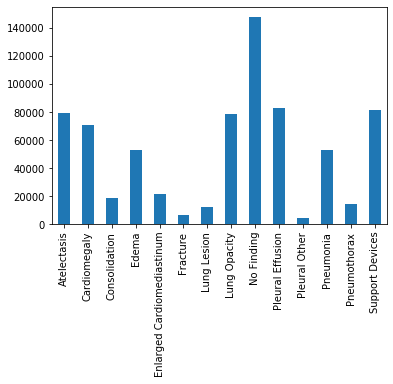

In [42]:
count = train_negbio[['Atelectasis', 'Cardiomegaly',
       'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture',
       'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion',
       'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices']].replace({-1:1})

count = count.sum(axis = 0, skipna = True)
ax = count.plot(kind='bar')
# print(count)

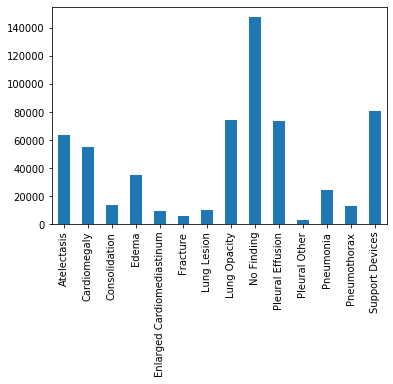

In [43]:
count = train_negbio[['Atelectasis', 'Cardiomegaly',
       'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture',
       'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion',
       'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices']].replace({-1:0})

count = count.sum(axis = 0, skipna = True)
ax = count.plot(kind='bar')
# print(count)